# 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')

# Display basic info
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# 2: Exploratory Data Analysis (EDA)

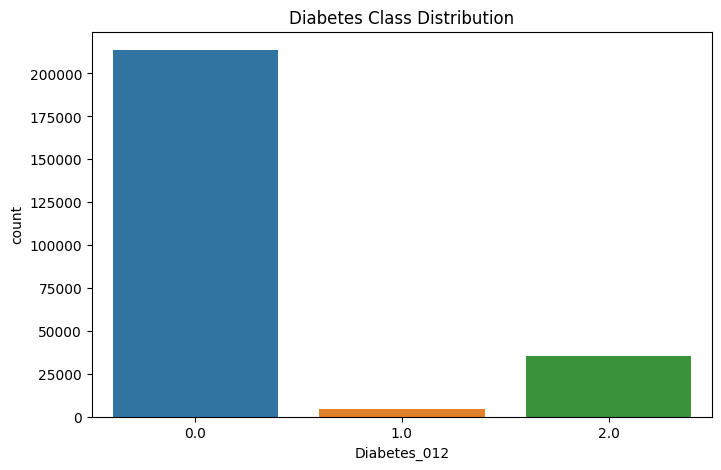

Class distribution (%):
Diabetes_012
0.0    84.241170
2.0    13.933302
1.0     1.825528
Name: proportion, dtype: float64

Missing values per column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


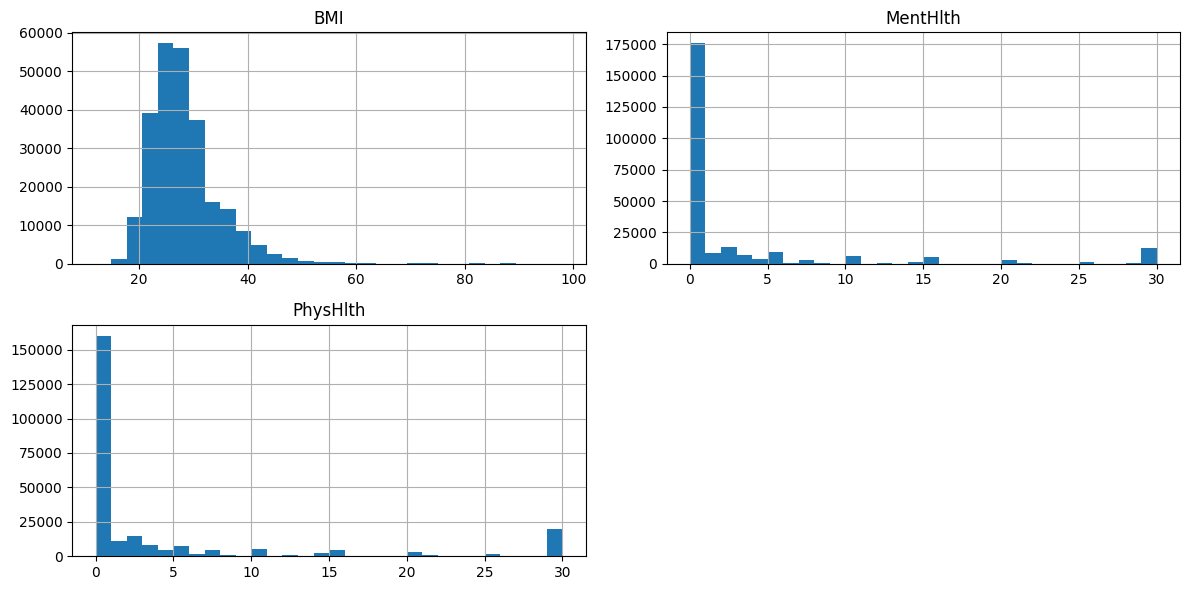

In [2]:
# Check target variable distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Diabetes_012')
plt.title('Diabetes Class Distribution')
plt.show()

# Print class percentages
print("Class distribution (%):")
print(df['Diabetes_012'].value_counts(normalize=True)*100)

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Plot numerical feature distributions
num_cols = ['BMI', 'MentHlth', 'PhysHlth']
df[num_cols].hist(bins=30, figsize=(12,6))
plt.tight_layout()
plt.show()

# 3: Data Preprocessing

In [3]:
# For binary classification, we'll combine prediabetes and diabetes (classes 1 and 2)
df['Diabetes_binary'] = df['Diabetes_012'].apply(lambda x: 1 if x >= 1 else 0)

# Verify new target distribution
print("New binary target distribution:")
print(df['Diabetes_binary'].value_counts(normalize=True)*100)

# Select features and target
features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 
            'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']
X = df[features]
y = df['Diabetes_binary']

# Convert all to float32 to reduce memory usage
X = X.astype('float32')
y = y.astype('float32')

New binary target distribution:
Diabetes_binary
0    84.24117
1    15.75883
Name: proportion, dtype: float64


# 4: Train-Test Split

In [4]:
# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Verify distributions
print("\nTraining class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Training set: (202944, 11)
Test set: (50736, 11)

Training class distribution:
Diabetes_binary
0.0    0.84241
1.0    0.15759
Name: proportion, dtype: float64

Test class distribution:
Diabetes_binary
0.0    0.84242
1.0    0.15758
Name: proportion, dtype: float64


#  5: Feature Scaling

In [5]:
# Scale numerical features
scaler = StandardScaler()
num_cols = ['BMI', 'MentHlth', 'PhysHlth']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Verify scaling
print("Scaled training data sample:")
print(X_train.head())

Scaled training data sample:
        HighBP  HighChol       BMI  Smoker  HeartDiseaseorAttack  \
124535     1.0       1.0 -0.058766     0.0                   1.0   
14723      0.0       0.0 -0.663964     0.0                   0.0   
121327     1.0       1.0  3.269824     1.0                   1.0   
81372      0.0       0.0  3.118525     1.0                   0.0   
15024      1.0       1.0 -0.210065     0.0                   0.0   

        PhysActivity  GenHlth  MentHlth  PhysHlth   Age  Income  
124535           0.0      4.0 -0.429213  0.087812  13.0     6.0  
14723            1.0      3.0  0.246027  0.661519   8.0     8.0  
121327           0.0      4.0 -0.159117  1.120485   8.0     4.0  
81372            0.0      3.0  3.622227  1.235226   4.0     4.0  
15024            1.0      1.0 -0.429213 -0.485896  13.0     7.0  


# 6: Model Training

In [6]:
# Initialize and train Random Forest
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

# 7: Model Evaluation

Model Accuracy: 0.8129927467675812

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     42741
         1.0       0.37      0.27      0.31      7995

    accuracy                           0.81     50736
   macro avg       0.62      0.59      0.60     50736
weighted avg       0.79      0.81      0.80     50736



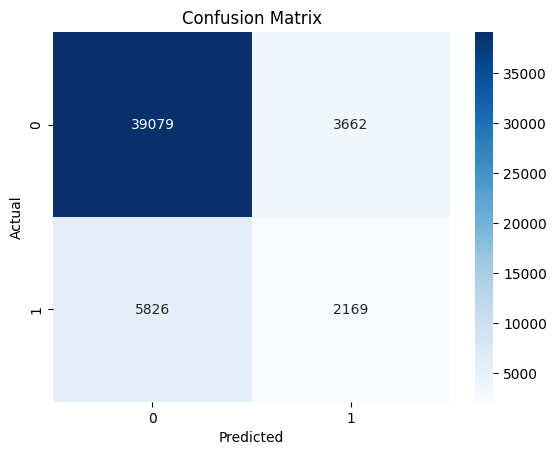

In [7]:
# Generate predictions
y_pred = model.predict(X_test)

# Calculate metrics
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 8: Feature Importance Analysis

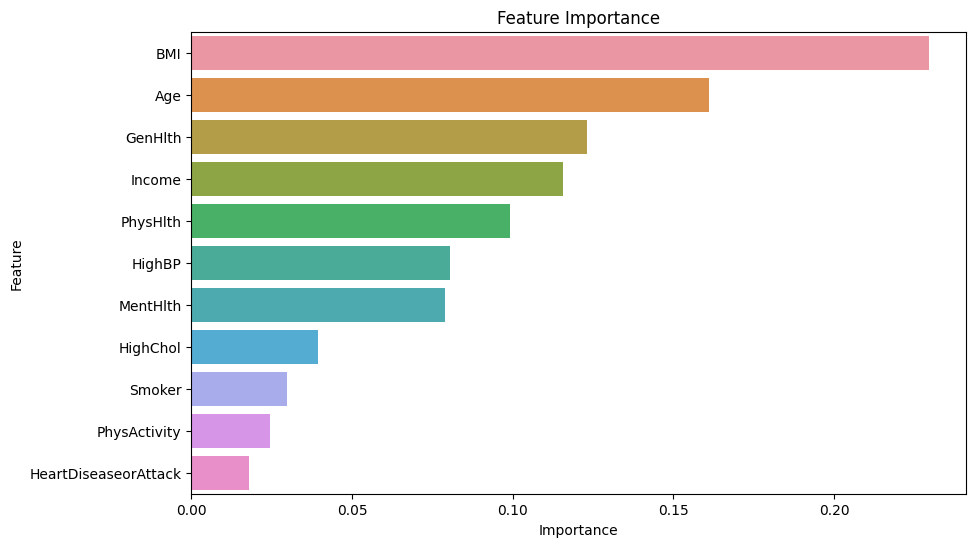

In [8]:
# Get feature importances
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()